In [1]:
#pip install numpy

In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import tensorflow as tf
import keras as ks


Using TensorFlow backend.


In [5]:
import keras

In [6]:
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#### Loading data

In [7]:
train=pd.read_csv(r"C:\Users\deepi\Desktop\SEM 2\train.csv",encoding="utf8")
test=pd.read_csv(r"C:\Users\deepi\Desktop\SEM 2\test.csv",encoding="utf8")

In [8]:
test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Reshaping the data to print images

In [9]:
z = np.empty(10, dtype=object) 
def imagePrint(digit):
    x=train[train.label == digit]
    y=x.head(1).values[-1,1:]
    z[digit]=y.reshape(28,28)
    
 

#### Printing Images

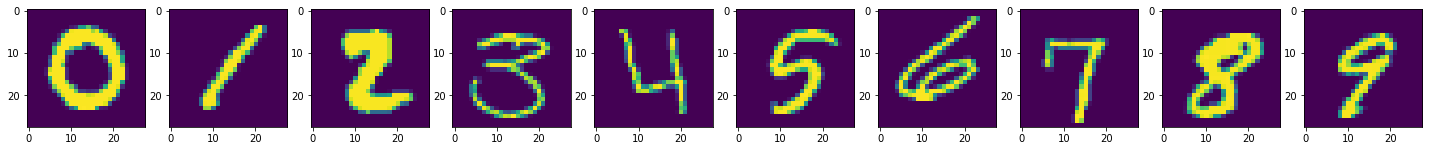

In [10]:
digits=[0,1,2,3,4,5,6,7,8,9]
for q in digits: 
   imagePrint(q)

fig = plt.figure(figsize=(25, 14))
#plotting the images for each digit
for i in range(len(z)):
  fig.add_subplot(1,10,i+1)
  plt.imshow(z[i])
 

#### Distribution of the labels

In [11]:
distribution=pd.DataFrame(train.label.value_counts())
distribution.columns = ['count']
distribution.insert(0,"label",distribution.index.values)
distribution.sort_values("label")

,label,count
0,0,4132
1,1,4684
2,2,4177
3,3,4351
4,4,4072
5,5,3795
6,6,4137
7,7,4401
8,8,4063
9,9,4188


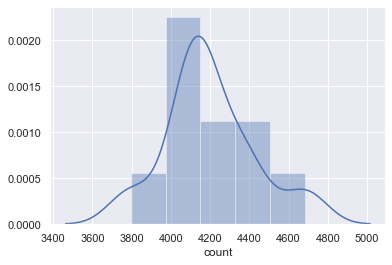

In [12]:
sns.set(color_codes=True)
sns.distplot(distribution["count"]);
#the labels are distributed almost uniformly and so we can consider as a balanced data.

#### LOGISTIC REGRESSION

In [13]:
c=[0.1,0.15,0.25,0.01,0.5,1,10] #varying costs to find the better performance. tested it on test data and the 
                                 #results are given in pdf.
for i in range(len(c)):
  model = LogisticRegression(C=c[i-1], penalty='l1', solver='saga',tol=0.1)
  model.fit(train.iloc[1:,1:], train.iloc[1:,0])
  sparsity = np.mean(model.coef_ == 0) * 100
  test_pred = model.predict(test.iloc[1:,:])
  pd.DataFrame(test_pred).to_csv('predicted_5_l1_'+str(c[i])+'.csv', index=False) 

C:\Users\deepi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\deepi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\deepi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\deepi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\deepi\Anaconda3\lib\site-pa

In [14]:
pd.DataFrame(test_pred).describe()

,0
count,27999.000000
mean,4.435623
std,2.911288
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


#### Neural Net Classifier

In [16]:
# save input image dimensions
img_rows, img_cols = 28, 28
x_train=train.iloc[:,1:].copy()
y_train=train.iloc[:,0].copy().values
x_test=test.iloc[1:,:].copy()
x_train = x_train.values.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)



In [17]:
#splitting the train data into train and validation
import random
random.seed(0)
split_size = int(x_train.shape[0]*0.7)
train_x,val_x = x_train[:split_size],x_train[split_size:]
train_y,val_y = y_train[:split_size],y_train[split_size:]

train_x = train_x.reshape (train_x.shape[0], img_rows, img_cols,1)
val_x = val_x.reshape (val_x.shape[0], img_rows, img_cols,1)

In [18]:
x_train.shape

(42000, 28, 28, 1)

In [83]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(200,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(10,activation='softmax'))

In [84]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [85]:
model.fit(train_x, train_y,
          epochs=10,
         verbose=1, validation_data = (val_x,val_y))
#y_test=pd.DataFrame(model.predict_classes(x_test))

Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 17s 571us/step - loss: 1.2881 - accuracy: 0.7516 - val_loss: 0.2679 - val_accuracy: 0.9283
Epoch 2/10
29399/29399 [==============================] - 19s 646us/step - loss: 0.3537 - accuracy: 0.9024 - val_loss: 0.1869 - val_accuracy: 0.9523
Epoch 3/10
29399/29399 [==============================] - 19s 655us/step - loss: 0.2477 - accuracy: 0.9321 - val_loss: 0.1752 - val_accuracy: 0.9557
Epoch 4/10
29399/29399 [==============================] - 19s 652us/step - loss: 0.2237 - accuracy: 0.9399 - val_loss: 0.1894 - val_accuracy: 0.9551
Epoch 5/10
29399/29399 [==============================] - 20s 690us/step - loss: 0.1771 - accuracy: 0.9513 - val_loss: 0.1379 - val_accuracy: 0.9629
Epoch 6/10
29399/29399 [==============================] - 20s 695us/step - loss: 0.1776 - accuracy: 0.9523 - val_loss: 0.1258 - val_accuracy: 0.9670
Epoch 7/10
29399/29399 [==============================] 

In [86]:
y_test=pd.DataFrame(model.predict_classes(x_test))

In [88]:
y_test.to_csv('predicted_testdata_new_final.csv', index=False)

In [76]:
##predicting the values of the validating data to get confusion matrix

In [68]:
predictions = model.predict_classes(val_x)

#### Confusion Matrix

In [89]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
cm = metrics.confusion_matrix(val_y, predictions)
#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [90]:
cm

array([[1239,    2,    2,    2,    0,    1,   16,    1,    0,    0],
       [   0, 1392,    3,    6,    0,    1,    3,    2,    3,    0],
       [  13,    5, 1135,   24,    3,    1,   11,   12,   20,    2],
       [   0,    3,   24, 1228,    0,   21,    4,    9,   23,    5],
       [   2,    6,    3,    0, 1109,    0,   14,    1,    5,   44],
       [   4,    1,    0,   29,    2, 1071,   13,    0,   12,    3],
       [  10,    4,    2,    1,    2,   11, 1197,    0,    0,    0],
       [   3,    2,   14,    2,    6,    1,    0, 1278,    3,   23],
       [   3,   49,   10,   21,    5,   58,   14,    4, 1062,    9],
       [   5,    4,    2,   14,   10,   11,    0,   36,   10, 1180]],
      dtype=int64)

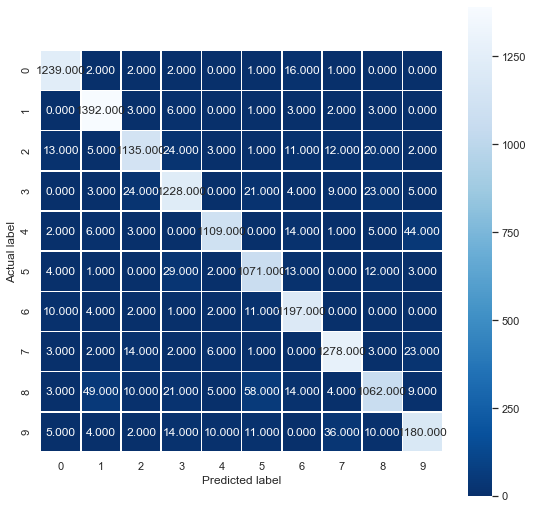

In [91]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [138]:
##classification report
report=pd.DataFrame(classification_report(val_y,predictions,output_dict=True)).transpose()
report.insert(0,"label",report.index.values)

In [139]:
report

,label,f1-score,precision,recall,support
0,0,0.974823,0.968726,0.980998,1263.000000
1,1,0.967338,0.948229,0.987234,1410.000000
2,2,0.937629,0.949791,0.925775,1226.000000
3,3,0.928896,0.925396,0.932422,1317.000000
4,4,0.955623,0.975374,0.936655,1184.000000
5,5,0.926871,0.910714,0.943612,1135.000000
6,6,0.957983,0.941038,0.975550,1227.000000
7,7,0.955514,0.951601,0.959459,1332.000000
8,8,0.895070,0.933216,0.859919,1235.000000
9,9,0.929866,0.932070,0.927673,1272.000000


In [140]:
# label with lowest precision
min_index=report[report.precision == report.precision.min()]
min_index
## Label 5 has the lowest precision

,label,f1-score,precision,recall,support
5,5,0.926871,0.910714,0.943612,1135.0


## Displaying misclassified images

In [92]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(val_y, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

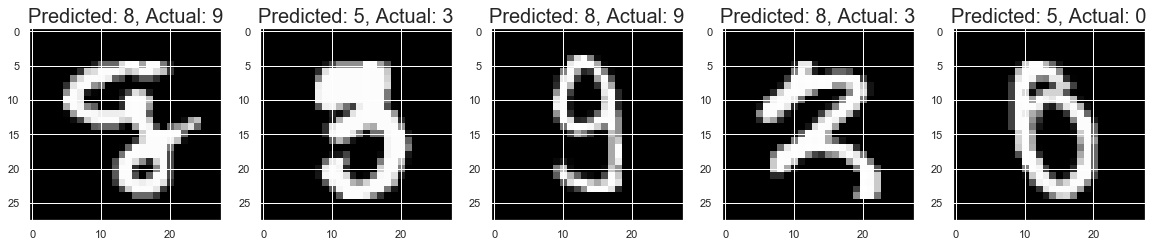

In [29]:
# printing misclassified images
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(val_x[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], val_y[badIndex]), fontsize = 20)